# <span style="color:orange"> Quantitative Comparison of BGFR algorithms // *For MRI QSM* </span> </br>
This notebook uses masks and a ground truth local field to compare the accuracy of different BGFR algorithms developed for Brain QSM, this algorithms are mostly implemented in Sepia Toolbox: </br>
https://sepia-documentation.readthedocs.io/en/latest/index.html </br>

We will load the ground truth Local field, extract metrics across a labeled spinal cord and compare the offset of white matter and gray matter on the Local fields! </br>

In the local field, higher value relates to paramagnetic reaction to the magnetic field B0 whereas diamagnetic materials will show lower values on the field. </br>

Throught his, it is expected that gray matter has higher frequency values than that of white matter and spinal cord CSF surrounding the spinal cord structure. </br>

Remember that this depends on the sign convention. We are using the rotating MR frame of reference where paramagnetic materials will show as positive and diamagnetic as negative.

In [2]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd
from utils.extract_metric import extract_metrics

## <span style="color:#FFCC80"> Across Vertebrae Levels // *For MRI QSM* </span> </br>

In [3]:
ground_truth_LF_path = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/local_field_Hz_gold_crop.nii.gz"
# Now we load the masks used for metric extraction
wm_mask_path = "E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_wm_mask.nii.gz"
gm_mask_path = "E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_gm_mask.nii.gz"
csf_mask_path = "E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_csf_mask.nii.gz"
sc_mask_path = "E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_sc_mask.nii.gz"
labeled_cord_path =  "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/labeled_cord_crop.nii.gz"

In [4]:
# Now we can load all the Local Fields to compare
lbv_LF_path = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/LBV_right/test1_def_params/Sepia_localfield.nii.gz"
pdf_LF_path = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/PDF_right/test1_def_params/Sepia_localfield.nii.gz"
vsharp_path = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/vsharp_right/test3_radii_1_4/Sepia_localfield.nii.gz"

In [ ]:
# Load images to the environment
# We need to create images of onl

In [5]:
# Extracting metrics with a SCT subprocess
# It should go inside the same folder where the "test" local field comes from

ground_truth_LF_wm_metrics = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/wm_metrics.csv"
ground_truth_LF_gm_metrics = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/gm_metrics.csv"
ground_truth_LF_csf_metrics = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/csf_metrics.csv"

lbv_outpath_wm_metrics = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/LBV_right/test1_def_params/wm_metrics.csv"
pdf_outpath_wm_metrics = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/PDF_right/test1_def_params/wm_metrics.csv"
vsharp_outpath_wm_metrics = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/vsharp_right/test3_radii_1_4/wm_metrics.csv"

lbv_outpath_csf_metrics = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/LBV_right/test1_def_params/csf_metrics.csv"
pdf_outpath_csf_metrics = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/PDF_right/test1_def_params/csf_metrics.csv"
vsharp_outpath_csf_metrics = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/vsharp_right/test3_radii_1_4/csf_metrics.csv"

lbv_outpath_gm_metrics = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/LBV_right/test1_def_params/gm_metrics.csv"
pdf_outpath_gm_metrics = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/PDF_right/test1_def_params/gm_metrics.csv"
vsharp_outpath_gm_metrics = "E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/vsharp_right/test3_radii_1_4/gm_metrics.csv"

In [18]:
# Call SCT subprocess, first lets extract WM values
extract_metrics(ground_truth_LF_path, gm_mask_path, labeled_cord_path, ground_truth_LF_gm_metrics, "wa", "1:13", perlevel="1")
extract_metrics(lbv_LF_path, gm_mask_path, labeled_cord_path, lbv_outpath_gm_metrics, "wa", "1:13", perlevel="1")
extract_metrics(pdf_LF_path, gm_mask_path, labeled_cord_path, pdf_outpath_gm_metrics, "wa", "1:13", perlevel="1")
extract_metrics(vsharp_path, gm_mask_path, labeled_cord_path, vsharp_outpath_gm_metrics, "wa", "1:13", perlevel="1")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/local_field_Hz_gold_crop.nii.gz -f E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_gm_mask.nii.gz -method wa -vert 1:13 -vertfile E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/labeled_cord_crop.nii.gz -perlevel 1 -o E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/gm_metrics.csv
--


Load metric image...
Estimation for label: cropped_gm_mask

Done! To view results, type:
start E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/gm_metrics.csv


Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/LBV_right/test1_def_params/Sepia_localfield.nii.gz -f E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_gm_mask.nii.gz -method wa -vert 1:13 -vertfile E:/msc_data/sc_qsm/data/cropped/piec

In [19]:
# CSF per level metrics
extract_metrics(ground_truth_LF_path, csf_mask_path, labeled_cord_path, ground_truth_LF_csf_metrics, "wa", "1:13", perlevel="1")
extract_metrics(lbv_LF_path, csf_mask_path, labeled_cord_path, lbv_outpath_csf_metrics, "wa", "1:13", perlevel="1")
extract_metrics(pdf_LF_path, csf_mask_path, labeled_cord_path, pdf_outpath_csf_metrics, "wa", "1:13", perlevel="1")
extract_metrics(vsharp_path, csf_mask_path, labeled_cord_path, vsharp_outpath_csf_metrics, "wa", "1:13", perlevel="1")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/local_field_Hz_gold_crop.nii.gz -f E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_csf_mask.nii.gz -method wa -vert 1:13 -vertfile E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/labeled_cord_crop.nii.gz -perlevel 1 -o E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/csf_metrics.csv
--


Load metric image...
Estimation for label: cropped_csf_mask

Done! To view results, type:
start E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/csf_metrics.csv


Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/LBV_right/test1_def_params/Sepia_localfield.nii.gz -f E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_csf_mask.nii.gz -method wa -vert 1:13 -vertfile E:/msc_data/sc_qsm/data/cropped

In [20]:
# White matter per level metrics
extract_metrics(ground_truth_LF_path, wm_mask_path, labeled_cord_path, ground_truth_LF_wm_metrics, "wa", "1:13", perlevel="1")
extract_metrics(lbv_LF_path, wm_mask_path, labeled_cord_path, lbv_outpath_wm_metrics, "wa", "1:13", perlevel="1")
extract_metrics(pdf_LF_path, wm_mask_path, labeled_cord_path, pdf_outpath_wm_metrics, "wa", "1:13", perlevel="1")
extract_metrics(vsharp_path, wm_mask_path, labeled_cord_path, vsharp_outpath_wm_metrics, "wa", "1:13", perlevel="1")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/local_field_Hz_gold_crop.nii.gz -f E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_wm_mask.nii.gz -method wa -vert 1:13 -vertfile E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/labeled_cord_crop.nii.gz -perlevel 1 -o E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/wm_metrics.csv
--


Load metric image...
Estimation for label: cropped_wm_mask

Done! To view results, type:
start E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/wm_metrics.csv


Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/LBV_right/test1_def_params/Sepia_localfield.nii.gz -f E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_wm_mask.nii.gz -method wa -vert 1:13 -vertfile E:/msc_data/sc_qsm/data/cropped/piec

### <span style="color:#FFEB3B"> White matter metrics // *BGFR QSM* </span> </br>

In [14]:
ground_truth_wm_df =  pd.read_csv(ground_truth_LF_wm_metrics)
ground_truth_wm_data = ground_truth_wm_df['WA()'][::-1]

lbv_wm_df = pd.read_csv(lbv_outpath_wm_metrics)
lbv_wm_data = lbv_wm_df['WA()'][::-1]

pdf_wm_df = pd.read_csv(pdf_outpath_wm_metrics)
pdf_wm_data = pdf_wm_df["WA()"][::-1]

vsharp_wm_df = pd.read_csv(vsharp_outpath_wm_metrics)
vsharp_wm_data = vsharp_wm_df["WA()"][::-1]

In [10]:
vertebrae_levels = ['C1','C2','C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5','T6']

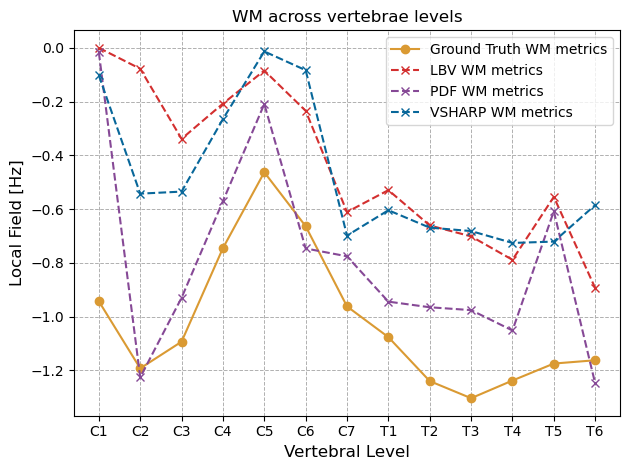

In [21]:
plt.plot(vertebrae_levels, ground_truth_wm_data, marker = 'o', linestyle = '-', label = "Ground Truth WM metrics", color = "#DA9A33")
plt.plot(vertebrae_levels, lbv_wm_data, marker = 'x', linestyle = '--', label = "LBV WM metrics", color = "#D32F2F")
plt.plot(vertebrae_levels, pdf_wm_data, marker = 'x', linestyle = '--', label = "PDF WM metrics", color = "#864996")
plt.plot(vertebrae_levels, vsharp_wm_data, marker = 'x', linestyle = '--', label = "VSHARP WM metrics", color = "#08679A")

plt.title("WM across vertebrae levels")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('Local Field [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()


### <span style="color:#929A9F"> White matter metrics // *BGFR QSM* </span> </br>

In [22]:
ground_truth_gm_df =  pd.read_csv(ground_truth_LF_gm_metrics)
ground_truth_gm_data = ground_truth_gm_df['WA()'][::-1]

lbv_gm_df = pd.read_csv(lbv_outpath_gm_metrics)
lbv_gm_data = lbv_gm_df['WA()'][::-1]

pdf_gm_df = pd.read_csv(pdf_outpath_gm_metrics)
pdf_gm_data = pdf_gm_df["WA()"][::-1]

vsharp_gm_df = pd.read_csv(vsharp_outpath_gm_metrics)
vsharp_gm_data = vsharp_gm_df["WA()"][::-1]

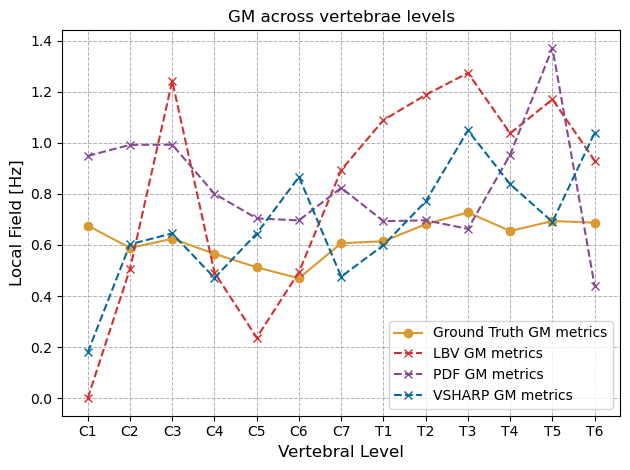

In [23]:
plt.plot(vertebrae_levels, ground_truth_gm_data, marker = 'o', linestyle = '-', label = "Ground Truth GM metrics", color = "#DA9A33")
plt.plot(vertebrae_levels, lbv_gm_data, marker = 'x', linestyle = '--', label = "LBV GM metrics", color = "#D32F2F")
plt.plot(vertebrae_levels, pdf_gm_data, marker = 'x', linestyle = '--', label = "PDF GM metrics", color = "#864996")
plt.plot(vertebrae_levels, vsharp_gm_data, marker = 'x', linestyle = '--', label = "VSHARP GM metrics", color = "#08679A")

plt.title("GM across vertebrae levels")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('Local Field [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### <span style="color:#CF4F4F"> CSF metrics // *BGFR QSM* </span> </br>


In [24]:
ground_truth_csf_df =  pd.read_csv(ground_truth_LF_csf_metrics)
ground_truth_csf_data = ground_truth_csf_df['WA()'][::-1]

lbv_csf_df = pd.read_csv(lbv_outpath_csf_metrics)
lbv_csf_data = lbv_csf_df['WA()'][::-1]

pdf_csf_df = pd.read_csv(pdf_outpath_csf_metrics)
pdf_csf_data = pdf_csf_df["WA()"][::-1]

vsharp_csf_df = pd.read_csv(vsharp_outpath_csf_metrics)
vsharp_csf_data = vsharp_csf_df["WA()"][::-1]

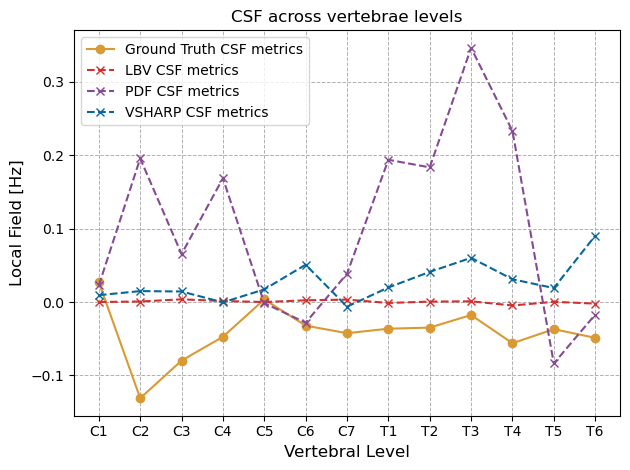

In [26]:
plt.plot(vertebrae_levels, ground_truth_csf_data, marker = 'o', linestyle = '-', label = "Ground Truth CSF metrics", color = "#DA9A33")
plt.plot(vertebrae_levels, lbv_csf_data, marker = 'x', linestyle = '--', label = "LBV CSF metrics", color = "#D32F2F")
plt.plot(vertebrae_levels, pdf_csf_data, marker = 'x', linestyle = '--', label = "PDF CSF metrics", color = "#864996")
plt.plot(vertebrae_levels, vsharp_csf_data, marker = 'x', linestyle = '--', label = "VSHARP CSF metrics", color = "#08679A")

plt.title("CSF across vertebrae levels")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('Local Field [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## <span style="color:#81D4FA"> Full masks // *For MRI QSM* </span> </br>

### <span style="color:#FFEB3B"> White matter metrics // *BGFR QSM* </span> </br>

In [35]:
extract_metrics(ground_truth_LF_path, wm_mask_path, labeled_cord_path, ground_truth_LF_wm_metrics, "wa", "1:13", perlevel="0")
extract_metrics(lbv_LF_path, wm_mask_path, labeled_cord_path, lbv_outpath_wm_metrics, "wa", "1:13", perlevel="0")
extract_metrics(pdf_LF_path, wm_mask_path, labeled_cord_path, pdf_outpath_wm_metrics, "wa", "1:13", perlevel="0")
extract_metrics(vsharp_path, wm_mask_path, labeled_cord_path, vsharp_outpath_wm_metrics, "wa", "1:13", perlevel="0")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/local_field_Hz_gold_crop.nii.gz -f E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_wm_mask.nii.gz -method wa -vert 1:13 -vertfile E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/labeled_cord_crop.nii.gz -perlevel 0 -o E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/wm_metrics.csv
--


Load metric image...
Estimation for label: cropped_wm_mask

Done! To view results, type:
start E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/wm_metrics.csv


Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/LBV_right/test1_def_params/Sepia_localfield.nii.gz -f E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_wm_mask.nii.gz -method wa -vert 1:13 -vertfile E:/msc_data/sc_qsm/data/cropped/piec

In [36]:
ground_truth_wm_df =  pd.read_csv(ground_truth_LF_wm_metrics)
ground_truth_wm_data = ground_truth_wm_df['WA()'][::-1]

lbv_wm_df = pd.read_csv(lbv_outpath_wm_metrics)
lbv_wm_data = lbv_wm_df['WA()'][::-1]

pdf_wm_df = pd.read_csv(pdf_outpath_wm_metrics)
pdf_wm_data = pdf_wm_df["WA()"][::-1]

vsharp_wm_df = pd.read_csv(vsharp_outpath_wm_metrics)
vsharp_wm_data = vsharp_wm_df["WA()"][::-1]

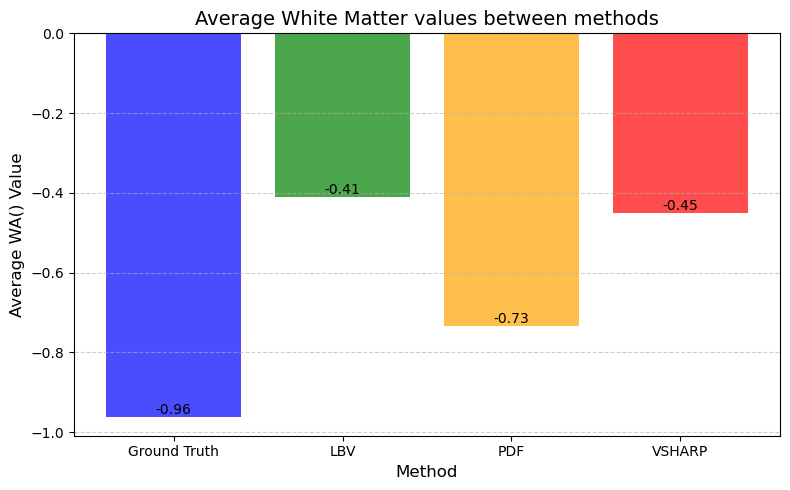

In [37]:
# Data for the barplot
methods = ['Ground Truth', 'LBV', 'PDF', 'VSHARP']
values = [
    ground_truth_wm_data.mean(),  # Mean of the ground truth white matter values
    lbv_wm_data.mean(),          # Mean of LBV whgite matter values
    pdf_wm_data.mean(),          # Mean of PDF white matter values
    vsharp_wm_data.mean()        # Mean of VSHARP white matter values
]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(methods, values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Average White Matter values between methods', fontsize=14)
plt.ylabel('Average WA() Value', fontsize=12)
plt.xlabel('Method', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

### <span style="color:#929A9F"> White matter metrics // *BGFR QSM* </span> </br>

In [27]:
# Extracting metrics no perlevel with GM masks
extract_metrics(ground_truth_LF_path, gm_mask_path, labeled_cord_path, ground_truth_LF_gm_metrics, "wa", "1:13", perlevel="0")
extract_metrics(lbv_LF_path, gm_mask_path, labeled_cord_path, lbv_outpath_gm_metrics, "wa", "1:13", perlevel="0")
extract_metrics(pdf_LF_path, gm_mask_path, labeled_cord_path, pdf_outpath_gm_metrics, "wa", "1:13", perlevel="0")
extract_metrics(vsharp_path, gm_mask_path, labeled_cord_path, vsharp_outpath_gm_metrics, "wa", "1:13", perlevel="0")


Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/local_field_Hz_gold_crop.nii.gz -f E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_gm_mask.nii.gz -method wa -vert 1:13 -vertfile E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/labeled_cord_crop.nii.gz -perlevel 0 -o E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/gm_metrics.csv
--


Load metric image...
Estimation for label: cropped_gm_mask

Done! To view results, type:
start E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/gm_metrics.csv


Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/LBV_right/test1_def_params/Sepia_localfield.nii.gz -f E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_gm_mask.nii.gz -method wa -vert 1:13 -vertfile E:/msc_data/sc_qsm/data/cropped/piec

In [28]:
ground_truth_gm_df =  pd.read_csv(ground_truth_LF_gm_metrics)
ground_truth_gm_data = ground_truth_gm_df['WA()'][::-1]

lbv_gm_df = pd.read_csv(lbv_outpath_gm_metrics)
lbv_gm_data = lbv_gm_df['WA()'][::-1]

pdf_gm_df = pd.read_csv(pdf_outpath_gm_metrics)
pdf_gm_data = pdf_gm_df["WA()"][::-1]

vsharp_gm_df = pd.read_csv(vsharp_outpath_gm_metrics)
vsharp_gm_data = vsharp_gm_df["WA()"][::-1]

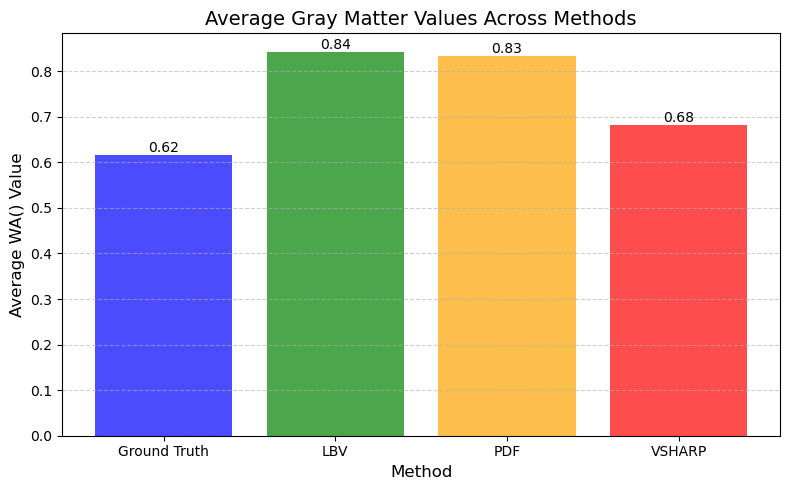

In [33]:
# Data for the barplot
methods = ['Ground Truth', 'LBV', 'PDF', 'VSHARP']
values = [
    ground_truth_gm_data.mean(),  # Mean of the ground truth gray matter values
    lbv_gm_data.mean(),          # Mean of LBV gray matter values
    pdf_gm_data.mean(),          # Mean of PDF gray matter values
    vsharp_gm_data.mean()        # Mean of VSHARP gray matter values
]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(methods, values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Average Gray Matter values between methods', fontsize=14)
plt.ylabel('Average WA() Value', fontsize=12)
plt.xlabel('Method', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

### <span style="color:#CF4F4F"> CSF metrics // *BGFR QSM* </span> </br>


In [38]:
extract_metrics(ground_truth_LF_path, csf_mask_path, labeled_cord_path, ground_truth_LF_csf_metrics, "wa", "1:13", perlevel="0")
extract_metrics(lbv_LF_path, csf_mask_path, labeled_cord_path, lbv_outpath_csf_metrics, "wa", "1:13", perlevel="0")
extract_metrics(pdf_LF_path, csf_mask_path, labeled_cord_path, pdf_outpath_csf_metrics, "wa", "1:13", perlevel="0")
extract_metrics(vsharp_path, csf_mask_path, labeled_cord_path, vsharp_outpath_csf_metrics, "wa", "1:13", perlevel="0")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/local_field_Hz_gold_crop.nii.gz -f E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_csf_mask.nii.gz -method wa -vert 1:13 -vertfile E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/labeled_cord_crop.nii.gz -perlevel 0 -o E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/csf_metrics.csv
--


Load metric image...
Estimation for label: cropped_csf_mask

Done! To view results, type:
start E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/ground_truth_metrics/csf_metrics.csv


Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.5)

sct_extract_metric -i E:/msc_data/sc_qsm/data/cropped/piece-wise/simulation/TE_1_weird_40/bgfr_sepia/LBV_right/test1_def_params/Sepia_localfield.nii.gz -f E:/msc_data/sc_qsm/data/cropped/piece-wise/cropped_csf_mask.nii.gz -method wa -vert 1:13 -vertfile E:/msc_data/sc_qsm/data/cropped

In [39]:
ground_truth_csf_df =  pd.read_csv(ground_truth_LF_csf_metrics)
ground_truth_csf_data = ground_truth_csf_df['WA()'][::-1]

lbv_csf_df = pd.read_csv(lbv_outpath_csf_metrics)
lbv_csf_data = lbv_csf_df['WA()'][::-1]

pdf_csf_df = pd.read_csv(pdf_outpath_csf_metrics)
pdf_csf_data = pdf_csf_df["WA()"][::-1]

vsharp_csf_df = pd.read_csv(vsharp_outpath_csf_metrics)
vsharp_csf_data = vsharp_csf_df["WA()"][::-1]

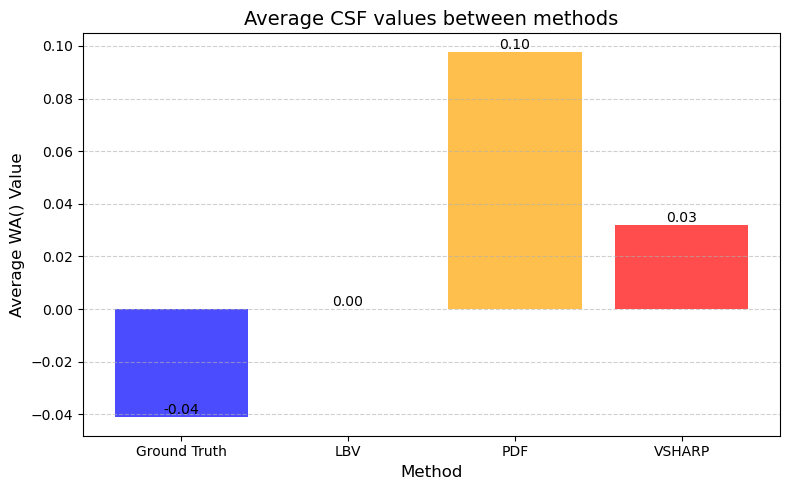

In [41]:
# Data for the barplot
methods = ['Ground Truth', 'LBV', 'PDF', 'VSHARP']
values = [
    ground_truth_csf_data.mean(),  # Mean of the ground truth white matter values
    lbv_csf_data.mean(),          # Mean of LBV whgite matter values
    pdf_csf_data.mean(),          # Mean of PDF white matter values
    vsharp_csf_data.mean()        # Mean of VSHARP white matter values
]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(methods, values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Average CSF values between methods', fontsize=14)
plt.ylabel('Average WA() Value', fontsize=12)
plt.xlabel('Method', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()